In [45]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("averkij/tennessee-eastman-process-simulation-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\shiny\.cache\kagglehub\datasets\averkij\tennessee-eastman-process-simulation-dataset\versions\1


In [46]:
import os
os.listdir(path)

['TEP_FaultFree_Testing.RData',
 'TEP_FaultFree_Training.RData',
 'TEP_Faulty_Testing.RData',
 'TEP_Faulty_Training.RData']

# Content
Each .RData file is an external representation of an R dataframe that can be read into an R environment with the 'load' function. The variables loaded are named ‘fault_free_training’, ‘fault_free_testing’, ‘faulty_testing’, and ‘faulty_training’, corresponding to the RData files.

Each dataframe contains 55 columns:

Column 1 ('faultNumber') ranges from 1 to 20 in the “Faulty” datasets and represents the fault type in the TEP. The “FaultFree” datasets only contain fault 0 (i.e. normal operating conditions).

Column 2 ('simulationRun') ranges from 1 to 500 and represents a different random number generator state from which a full TEP dataset was generated (Note: the actual seeds used to generate training and testing datasets were non-overlapping).

Column 3 ('sample') ranges either from 1 to 500 (“Training” datasets) or 1 to 960 (“Testing” datasets). The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours and 48 hours respectively. Note that the faults were introduced 1 and 8 hours into the Faulty Training and Faulty Testing datasets, respectively.

Columns 4 to 55 contain the process variables; the column names retain the original variable names.

link to the data : https://www.kaggle.com/datasets/averkij/tennessee-eastman-process-simulation-dataset

In [3]:
!pip install pyreadr


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# read the R files with the use of pyreader
import pyreadr
df_fault = pyreadr.read_r(path+'/TEP_Faulty_Training.RData')
df_fault = df_fault['faulty_training']
df_fault.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [5]:
df_fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column         Dtype  
---  ------         -----  
 0   faultNumber    int32  
 1   simulationRun  float64
 2   sample         int32  
 3   xmeas_1        float64
 4   xmeas_2        float64
 5   xmeas_3        float64
 6   xmeas_4        float64
 7   xmeas_5        float64
 8   xmeas_6        float64
 9   xmeas_7        float64
 10  xmeas_8        float64
 11  xmeas_9        float64
 12  xmeas_10       float64
 13  xmeas_11       float64
 14  xmeas_12       float64
 15  xmeas_13       float64
 16  xmeas_14       float64
 17  xmeas_15       float64
 18  xmeas_16       float64
 19  xmeas_17       float64
 20  xmeas_18       float64
 21  xmeas_19       float64
 22  xmeas_20       float64
 23  xmeas_21       float64
 24  xmeas_22       float64
 25  xmeas_23       float64
 26  xmeas_24       float64
 27  xmeas_25       float64
 28  xmeas_26       float64
 29  xmeas_27      

In [6]:
# check the existence of missing values
df_fault.isna().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [7]:
df_fault['faultNumber'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

In [48]:
# change data type of simulationRun and sample from float to integer
df_fault = df_fault.astype({'faultNumber':'int', 'simulationRun':'int', 'sample':'int'})
df_fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column         Dtype  
---  ------         -----  
 0   faultNumber    int64  
 1   simulationRun  int64  
 2   sample         int64  
 3   xmeas_1        float64
 4   xmeas_2        float64
 5   xmeas_3        float64
 6   xmeas_4        float64
 7   xmeas_5        float64
 8   xmeas_6        float64
 9   xmeas_7        float64
 10  xmeas_8        float64
 11  xmeas_9        float64
 12  xmeas_10       float64
 13  xmeas_11       float64
 14  xmeas_12       float64
 15  xmeas_13       float64
 16  xmeas_14       float64
 17  xmeas_15       float64
 18  xmeas_16       float64
 19  xmeas_17       float64
 20  xmeas_18       float64
 21  xmeas_19       float64
 22  xmeas_20       float64
 23  xmeas_21       float64
 24  xmeas_22       float64
 25  xmeas_23       float64
 26  xmeas_24       float64
 27  xmeas_25       float64
 28  xmeas_26       float64
 29  xmeas_27      

In [49]:
# load the fault-free data
df_free = pyreadr.read_r(path+'/TEP_FaultFree_Training.RData')
df_free = df_free['fault_free_training']
print(df_free['faultNumber'].unique()) # zero refers to being fault-free

[0.]


In [10]:
df_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    250000 non-null  float64
 1   simulationRun  250000 non-null  float64
 2   sample         250000 non-null  int32  
 3   xmeas_1        250000 non-null  float64
 4   xmeas_2        250000 non-null  float64
 5   xmeas_3        250000 non-null  float64
 6   xmeas_4        250000 non-null  float64
 7   xmeas_5        250000 non-null  float64
 8   xmeas_6        250000 non-null  float64
 9   xmeas_7        250000 non-null  float64
 10  xmeas_8        250000 non-null  float64
 11  xmeas_9        250000 non-null  float64
 12  xmeas_10       250000 non-null  float64
 13  xmeas_11       250000 non-null  float64
 14  xmeas_12       250000 non-null  float64
 15  xmeas_13       250000 non-null  float64
 16  xmeas_14       250000 non-null  float64
 17  xmeas_15       250000 non-nul

In [11]:
df_free.isna().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [50]:
# change data type of simulationRun and sample from float to integer
df_free = df_free.astype({'faultNumber':'int', 'simulationRun':'int', 'sample':'int'})

In [51]:
# combine the two
import numpy as np
import pandas as pd
df_combined = pd.concat([df_free, df_fault])
df_combined

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,20,500,496,0.23419,3655.3,4461.7,9.3448,27.008,42.481,2703.0,...,53.670,23.350,61.061,20.719,40.999,38.653,47.386,47.528,40.212,17.659
4999996,20,500,497,0.26704,3647.4,4540.2,9.3546,27.034,42.671,2704.7,...,54.650,26.362,60.020,20.263,41.579,33.624,47.536,47.647,41.199,18.741
4999997,20,500,498,0.26543,3630.3,4571.6,9.4089,27.129,42.470,2705.1,...,54.274,26.521,59.824,20.189,41.505,40.967,52.437,47.802,41.302,23.199
4999998,20,500,499,0.27671,3655.7,4498.9,9.3781,27.353,42.281,2705.8,...,53.506,26.781,62.818,20.453,40.208,40.957,47.628,48.086,40.510,15.932


Draw histograms of each TEP variable

In [14]:
# make a list of TEP variables
tep = df_fault.columns[3:].to_list()
len(tep)

52

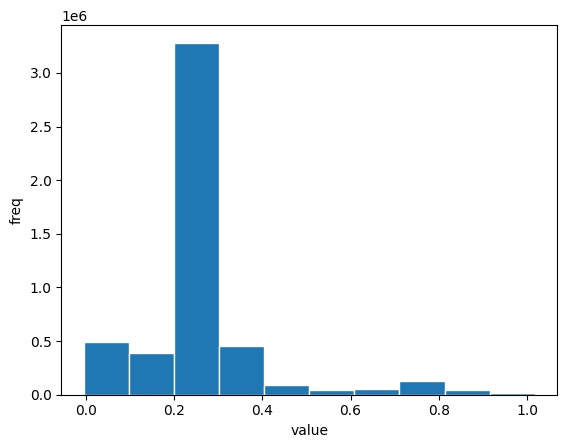

In [52]:
import matplotlib.pyplot as plt
plt.hist(df_fault[tep[0]], edgecolor='w')
plt.xlabel('value')
plt.ylabel('freq')
plt.show()

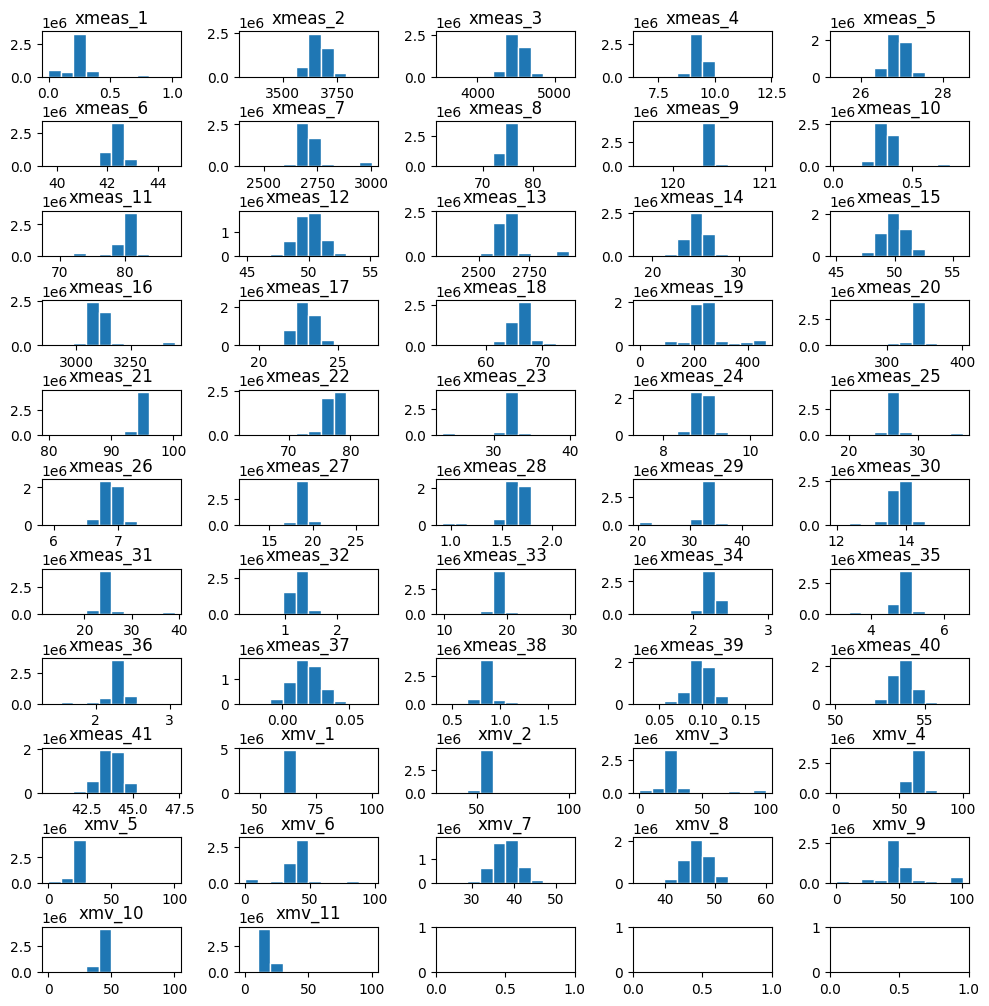

In [16]:
fig, axs = plt.subplots(11, 5, figsize=(10,10))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//5, i%5].hist(df_fault[tep[i]], edgecolor='w')
    axs[i//5, i%5].set_title(tep[i])
plt.show()

In [17]:
fig.savefig('df_fault.png')

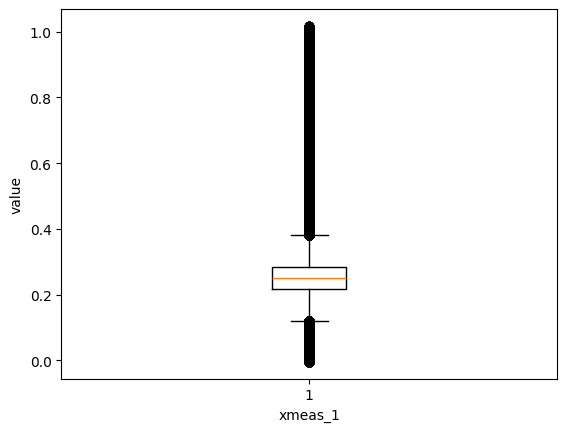

In [18]:
# their distributions appear not too bad, yet recheck them with box plot
plt.boxplot(df_fault[tep[0]])
plt.xlabel(tep[0])
plt.ylabel('value')
plt.show()

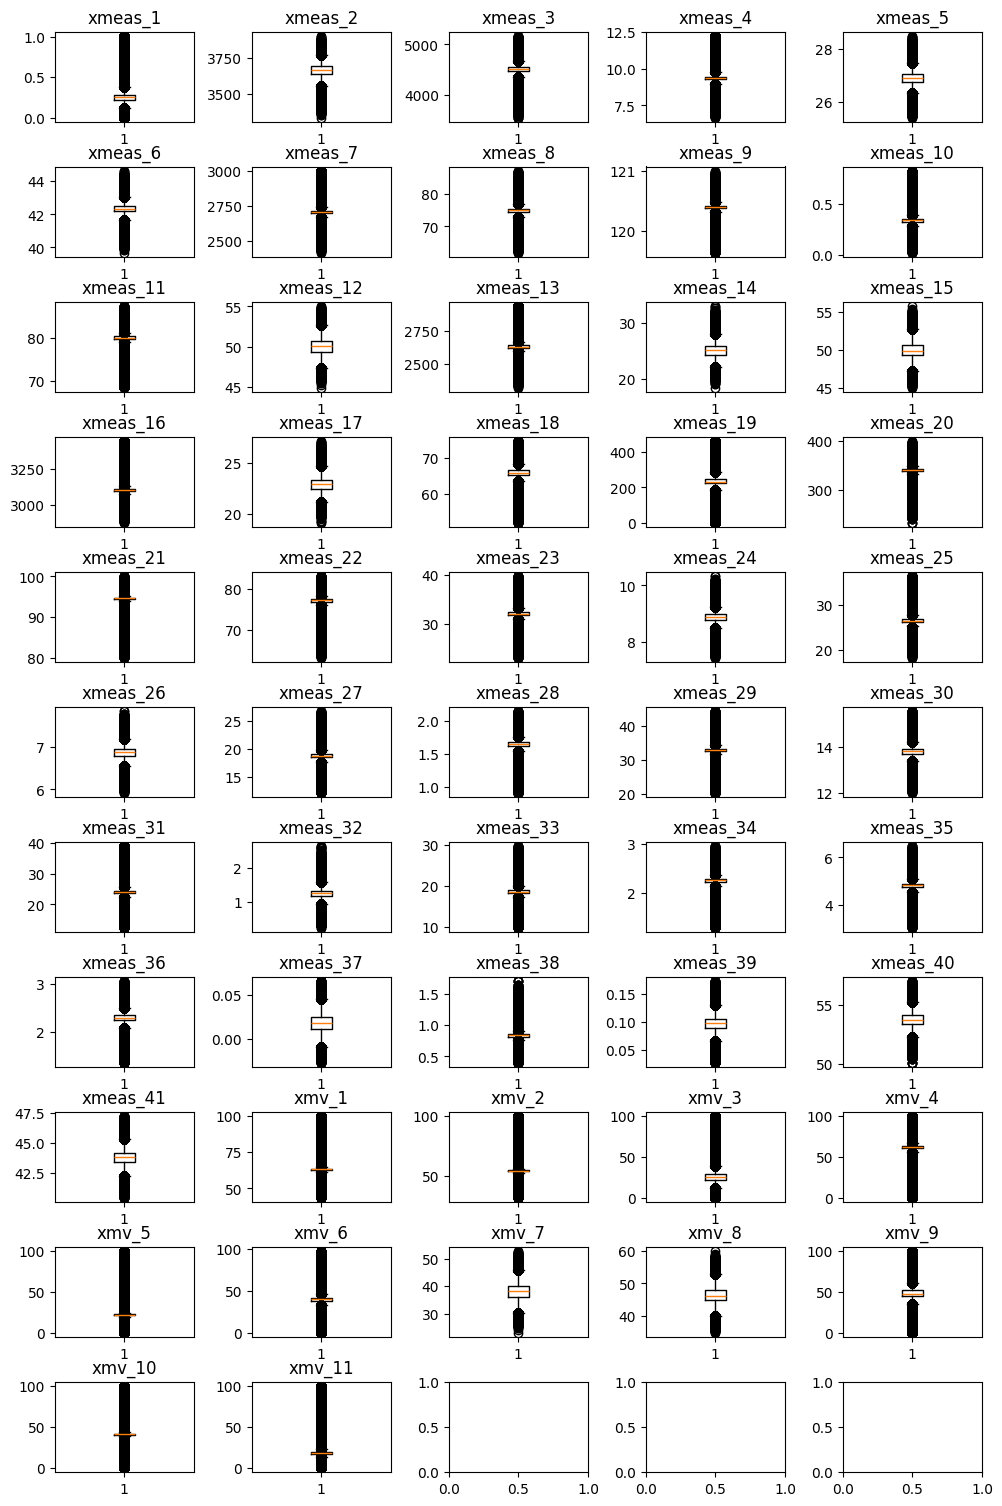

In [19]:
fig, axs = plt.subplots(11, 5, figsize=(10,15))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//5, i%5].boxplot(df_fault[tep[i]])
    axs[i//5, i%5].set_title(tep[i])
plt.show()

In [20]:
df_fault.describe()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,...,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.050000e+01,2.505000e+02,2.505000e+02,2.613588e-01,3.663777e+03,4.506046e+03,9.370345e+00,2.690156e+01,4.236419e+01,2.723005e+03,...,5.431755e+01,3.043177e+01,6.324830e+01,2.295485e+01,3.992297e+01,3.807265e+01,4.643742e+01,5.060598e+01,4.194845e+01,1.884376e+01
std,5.766282e+00,1.443373e+02,1.443373e+02,1.495384e-01,4.316941e+01,1.110368e+02,3.646151e-01,2.320034e-01,3.172128e-01,7.599384e+01,...,5.258092e+00,2.048365e+01,7.400080e+00,1.108258e+01,1.293348e+01,2.949138e+00,2.358468e+00,1.759840e+01,1.001227e+01,5.176705e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,-4.735000e-03,3.327400e+03,3.540700e+03,6.639900e+00,2.538600e+01,3.965600e+01,2.413800e+03,...,3.118400e+01,-2.718600e-01,-4.893100e-03,-9.941000e-02,0.000000e+00,2.280100e+01,3.492300e+01,-3.635500e-01,-2.809500e-01,-5.327000e-03
25%,5.750000e+00,1.257500e+02,1.257500e+02,2.183000e-01,3.636500e+03,4.469000e+03,9.264200e+00,2.676000e+01,4.218100e+01,2.697600e+03,...,5.349700e+01,2.228000e+01,6.031400e+01,2.142300e+01,3.831300e+01,3.604900e+01,4.487800e+01,4.547900e+01,4.057500e+01,1.714300e+01
50%,1.050000e+01,2.505000e+02,2.505000e+02,2.511300e-01,3.663300e+03,4.508500e+03,9.355200e+00,2.690100e+01,4.234800e+01,2.705600e+03,...,5.397000e+01,2.521500e+01,6.149900e+01,2.212900e+01,3.996700e+01,3.815000e+01,4.633900e+01,4.806500e+01,4.120600e+01,1.829500e+01
75%,1.525000e+01,3.752500e+02,3.752500e+02,2.832100e-01,3.690200e+03,4.548000e+03,9.456800e+00,2.704300e+01,4.252400e+01,2.715000e+03,...,5.444300e+01,2.879700e+01,6.284100e+01,2.273800e+01,4.150700e+01,3.999100e+01,4.803100e+01,5.188700e+01,4.194900e+01,1.953700e+01
max,2.000000e+01,5.000000e+02,5.000000e+02,1.017500e+00,3.906700e+03,5.175800e+03,1.224000e+01,2.848600e+01,4.465300e+01,3.000500e+03,...,1.000000e+02,1.001900e+02,1.000200e+02,1.001100e+02,9.752800e+01,5.312100e+01,5.998000e+01,1.005200e+02,1.003200e+02,1.000100e+02


There are too many outliers for now.. Can we simply remove them out of the dataset?
Yet the variables might have somthing to do with fault types. This can be chekcked by

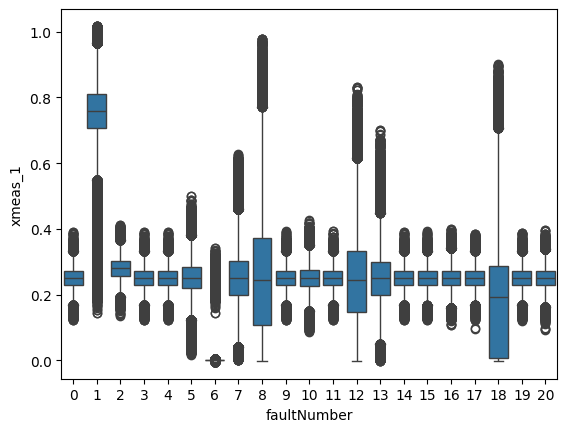

In [53]:
import seaborn as sns
sns.boxplot(x='faultNumber', y='xmeas_1', data=df_combined)
plt.show()

Based on 'xmeas_1', we can effectively detect the fault type one.

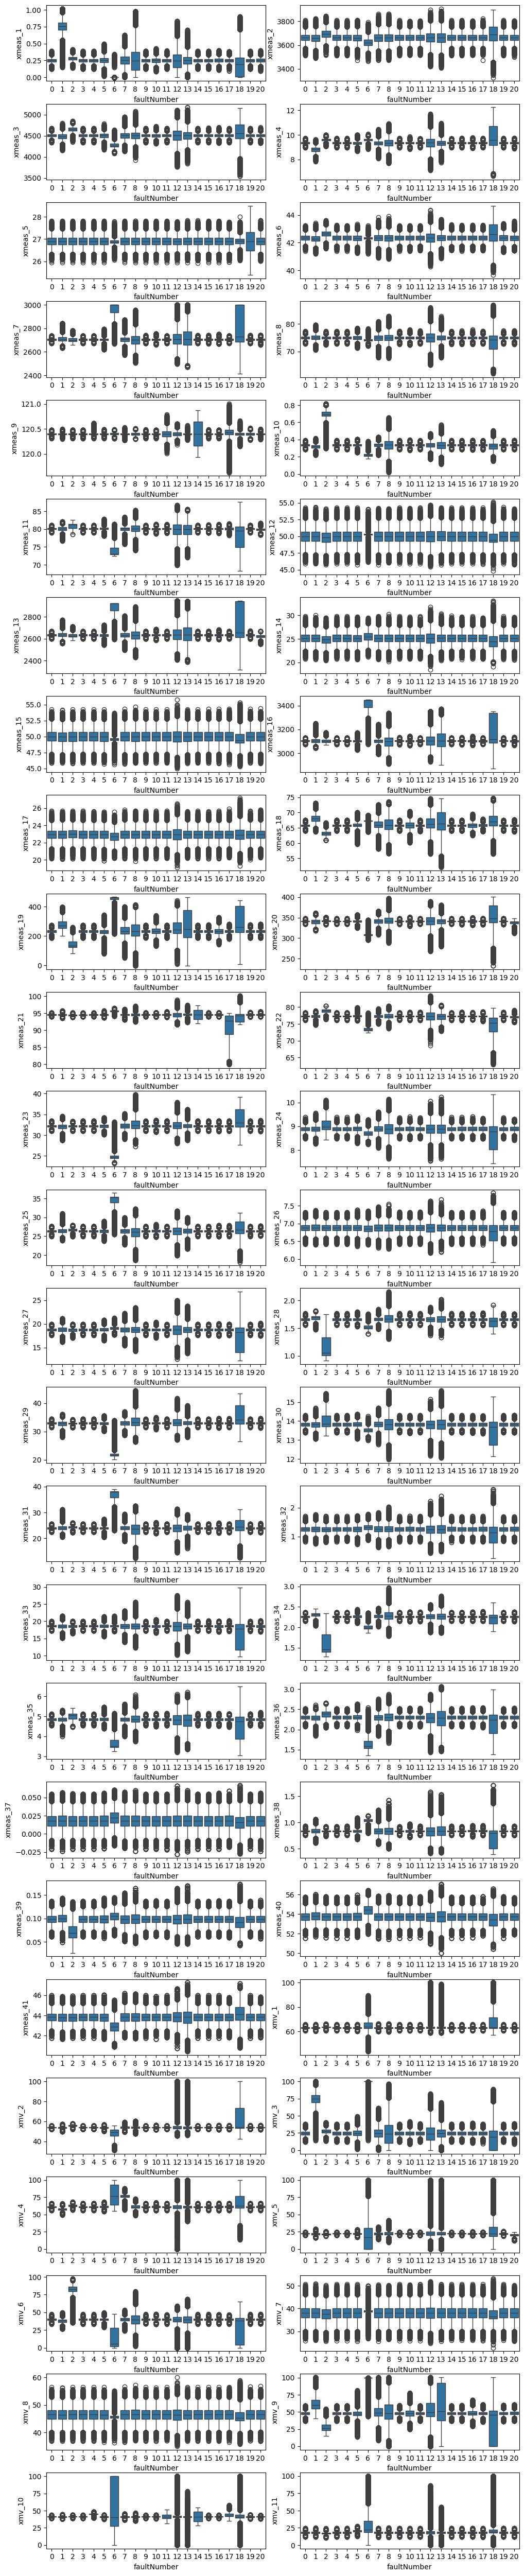

In [22]:
# check the other tep variables
fig, axs = plt.subplots(26,2, figsize=(10,50))
plt.tight_layout()
for idx, name in enumerate(tep):
    sns.boxplot(x='faultNumber', y=name, data=df_combined, ax=axs[idx//2, idx%2])
plt.show()

In [23]:
fig.savefig('tep_fault_type.png', bbox_inches='tight')

In [24]:
# save figures in different img files
nrows = 2
ncols = 2
idx = 0 # index for tep array
figNumMax = len(tep)//(nrows*ncols)
figNumMax

13

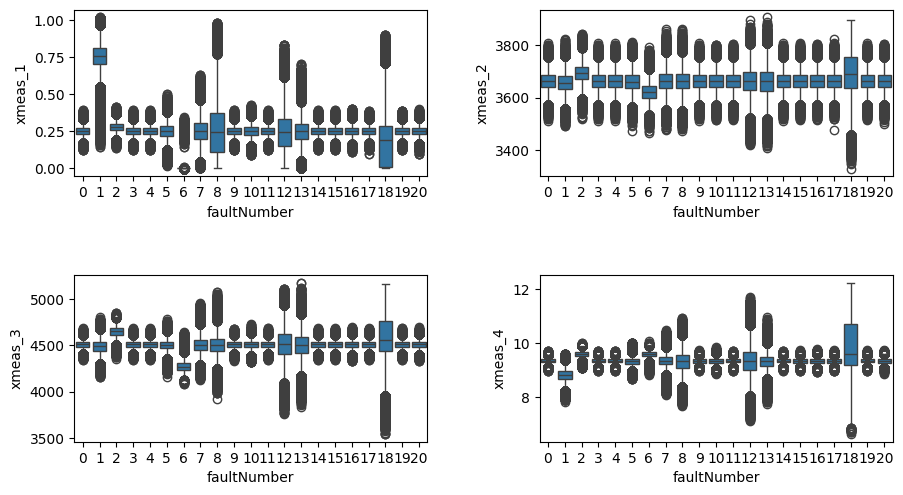

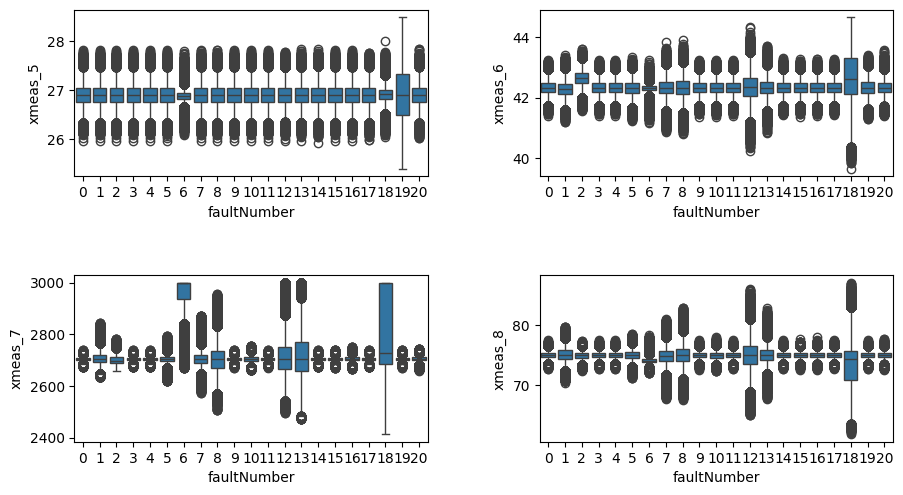

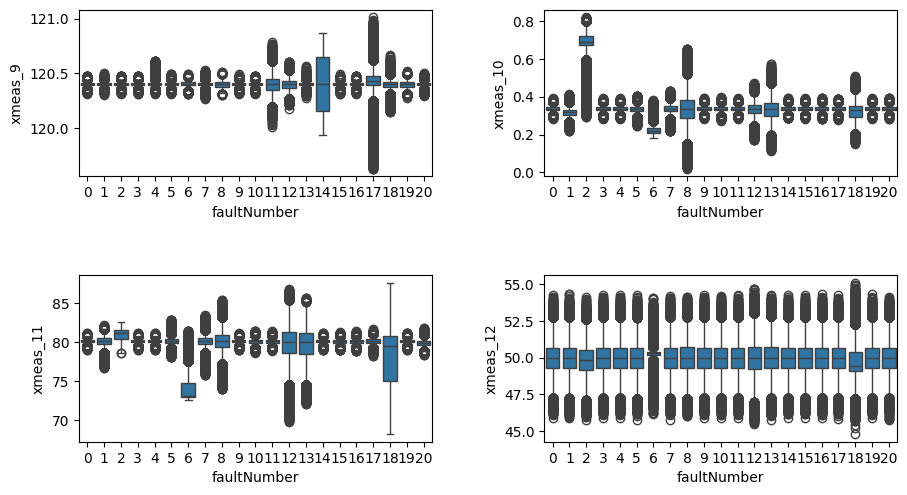

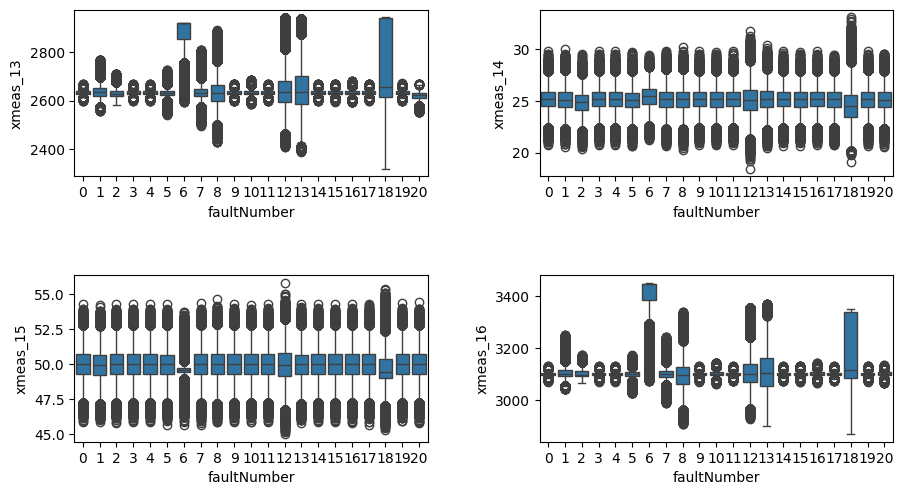

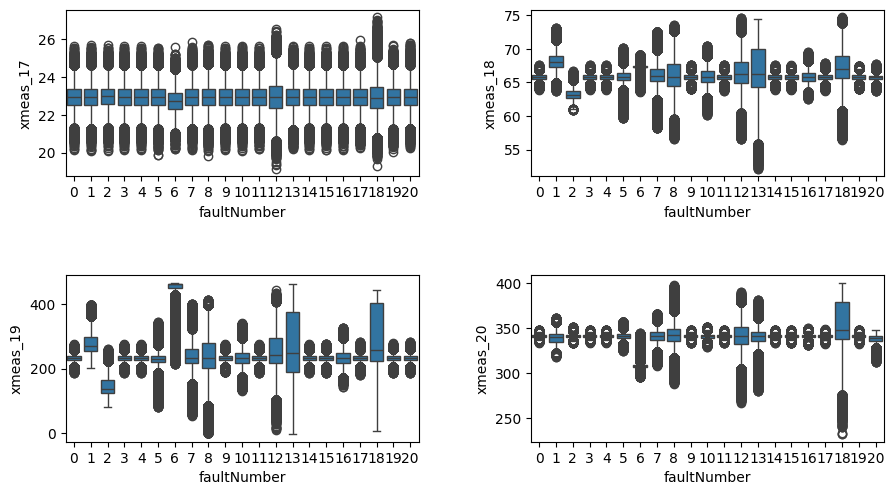

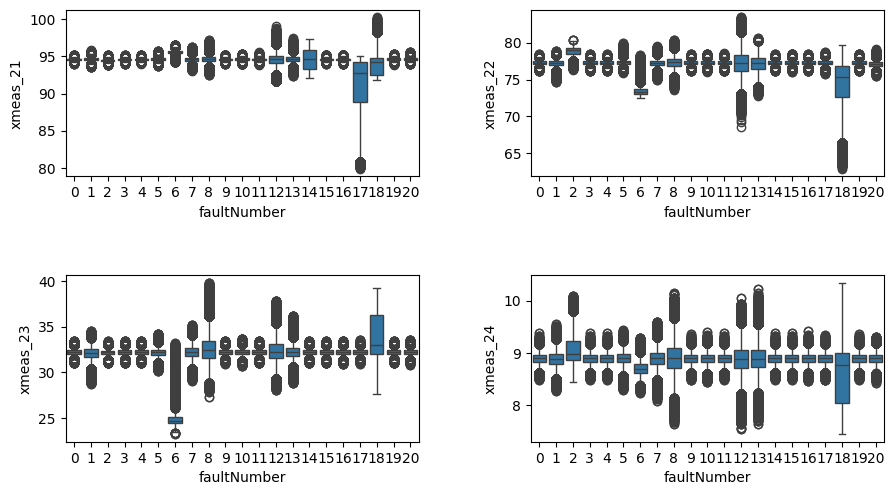

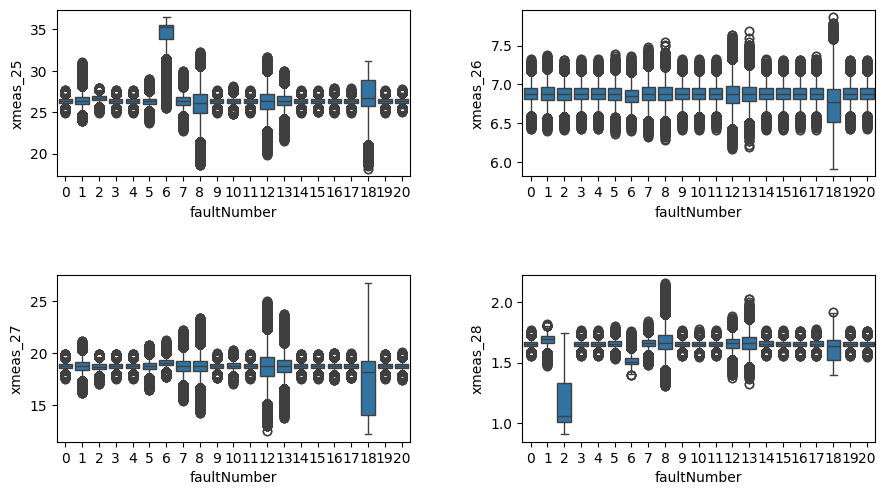

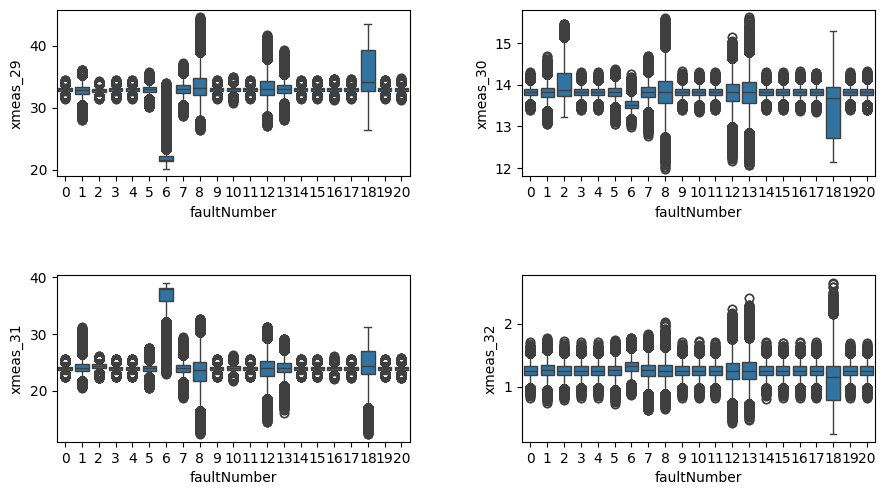

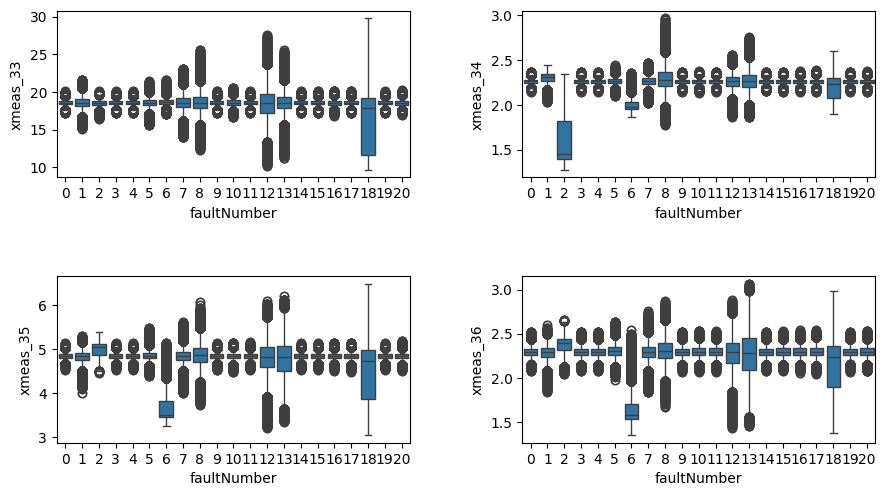

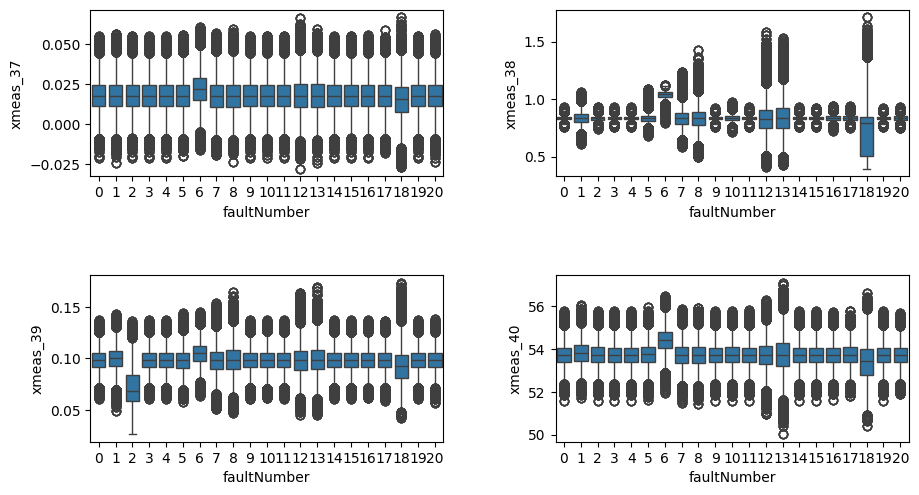

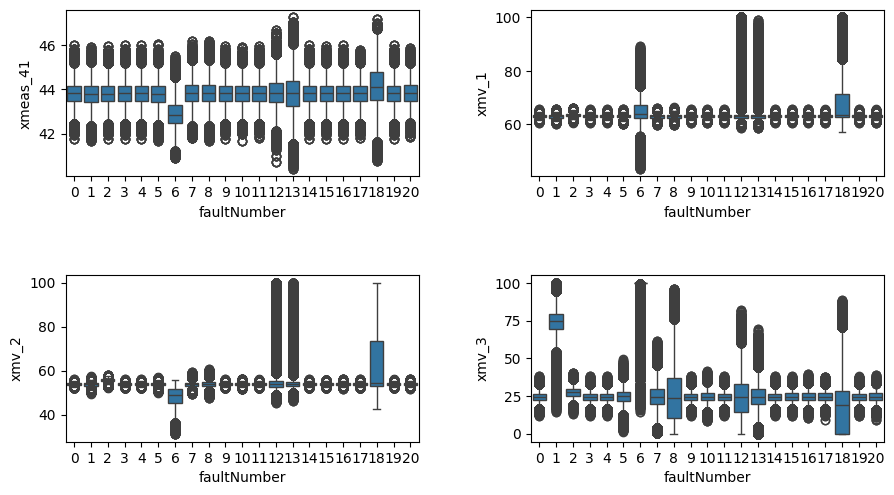

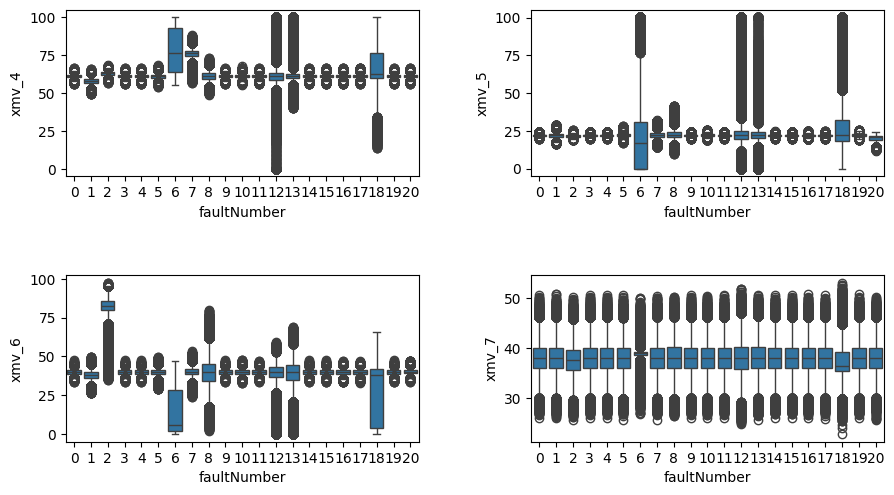

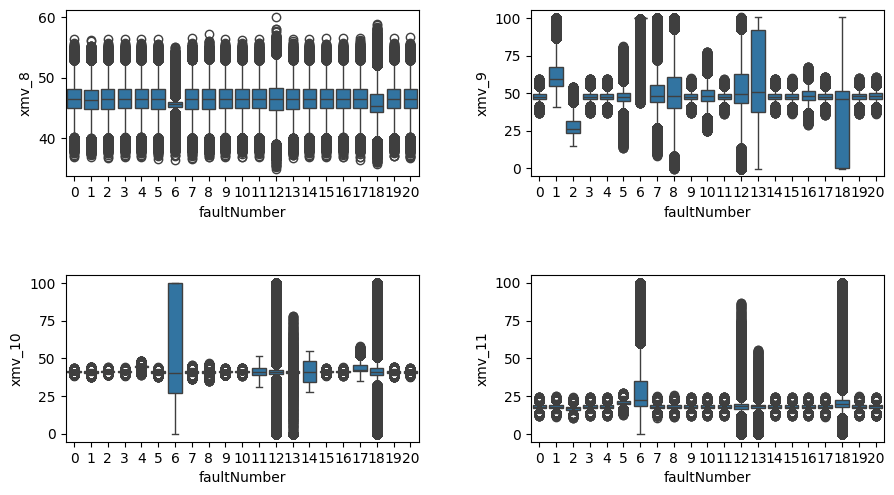

In [25]:
for n in range(figNumMax):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
    plt.tight_layout(pad=5)
    for i in range(nrows): # 0, 1
        for j in range(ncols): # 0, 1
            temp_idx = 2*i + j
            sns.boxplot(x='faultNumber', y=tep[4*n+temp_idx], data=df_combined, ax=axs[i, j])           
            idx += 1
    plt.show()
    fig.savefig('tep_fault_type_{n}.png'.format(n=n+1))

Obviously we don't need all the variables since some variables do not show significant difference from the fault-free one.
For example, 'xmeas_2' seems to be of little use.

Text(0.5, 1.0, 'heatmap of tep data')

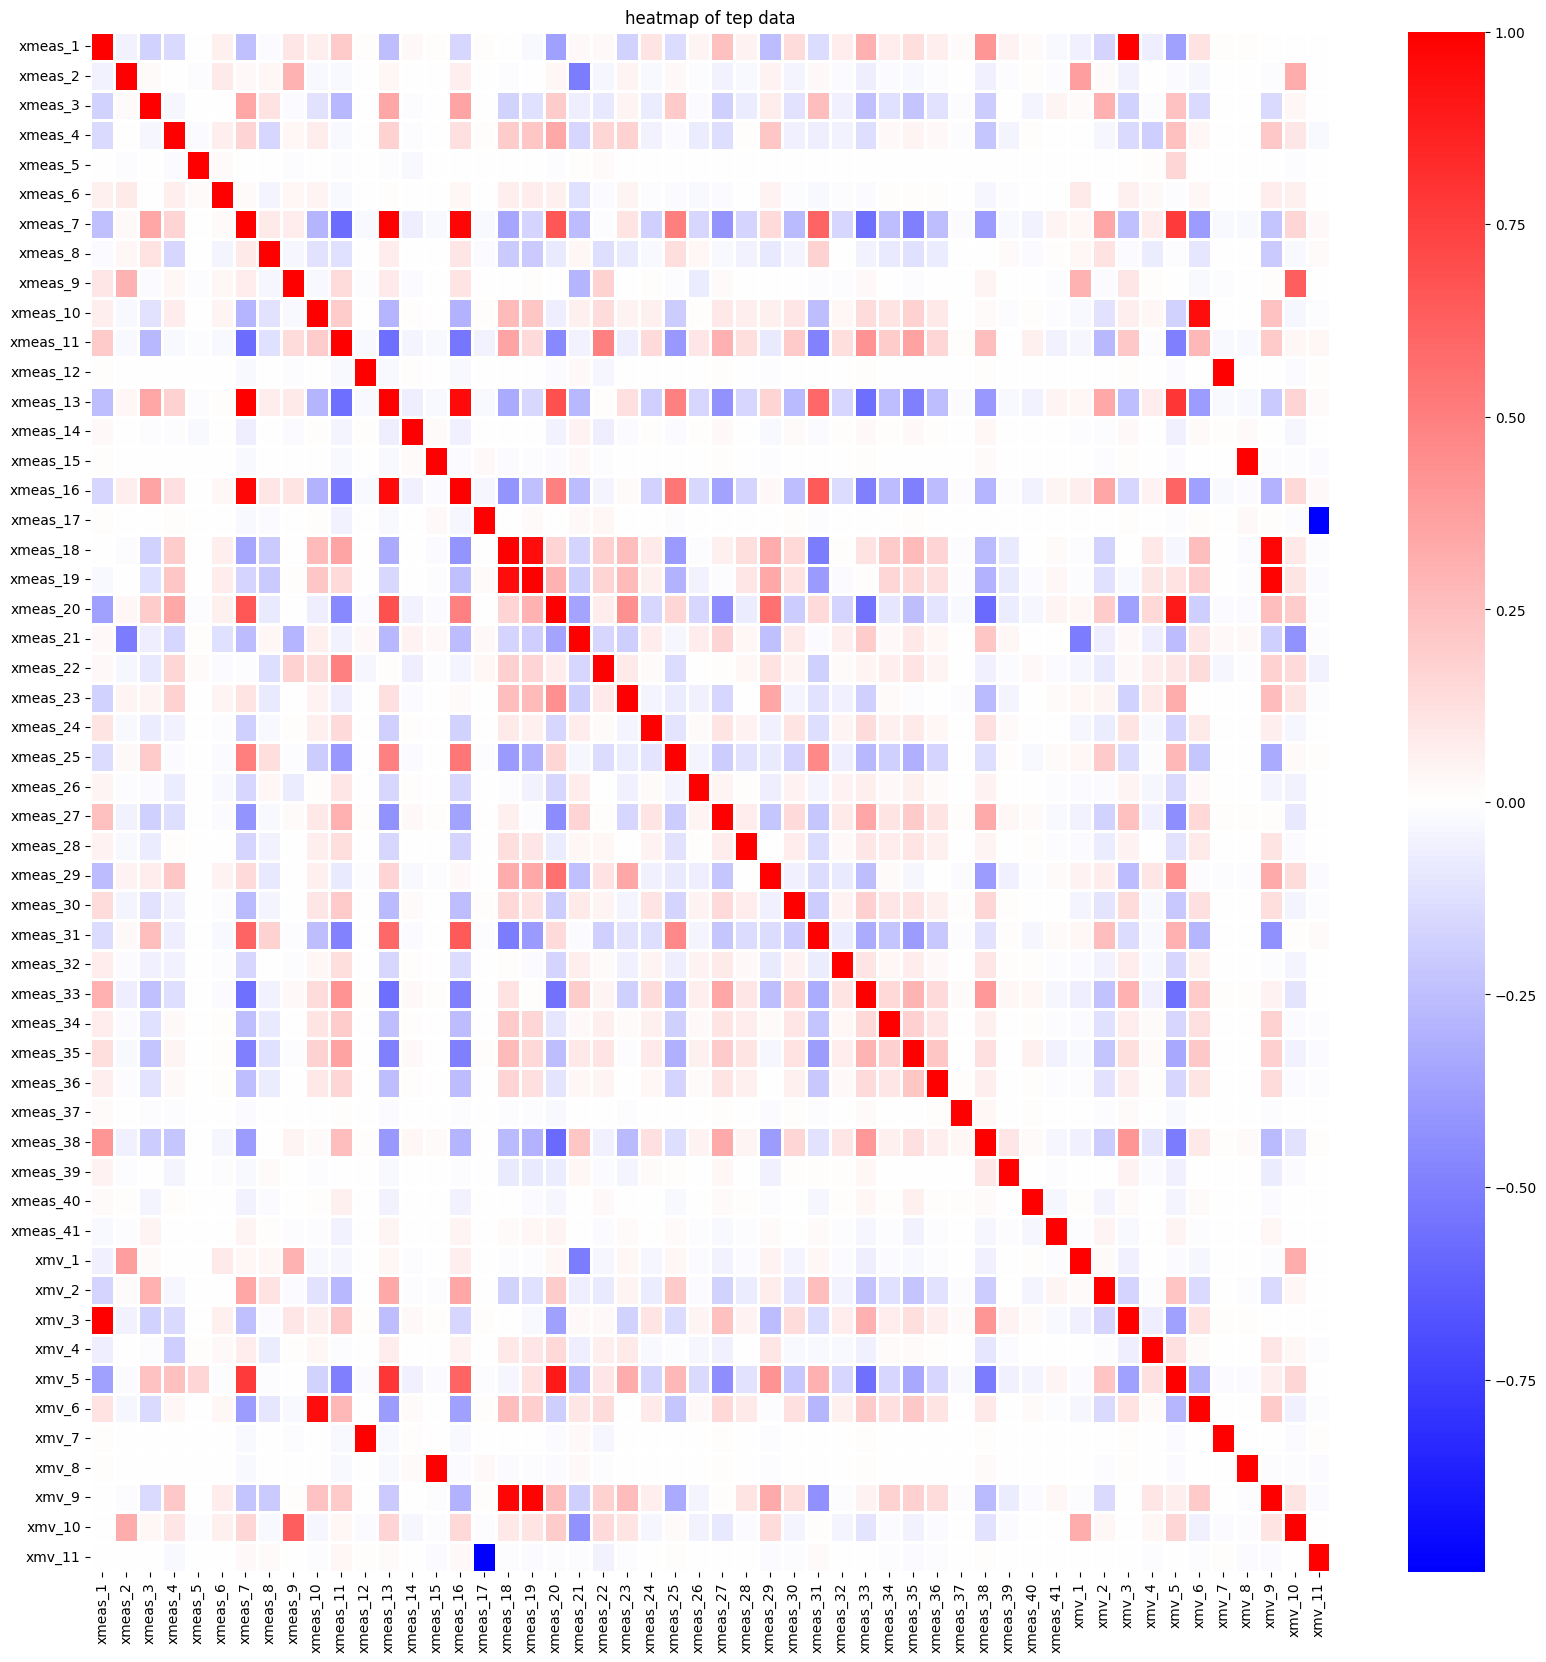

In [26]:
# leaving the previous cell unexecuted, study correalation between variables
corr_free = df_free.iloc[:,3:].corr()
fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(corr_free, annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr)
axs.set_title('heatmap of tep data')

In [27]:
fig.savefig('tep_free_heatmap.png')

In [28]:
# to easily notice correlated pairs of variabls,
for i in tep:
    corr_free[i] = corr_free[i].apply(lambda x : x if (x>=0.5) | (x<=-0.5) else 0)
corr_free.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
xmeas_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.996587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xmeas_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xmeas_3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xmeas_4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xmeas_5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


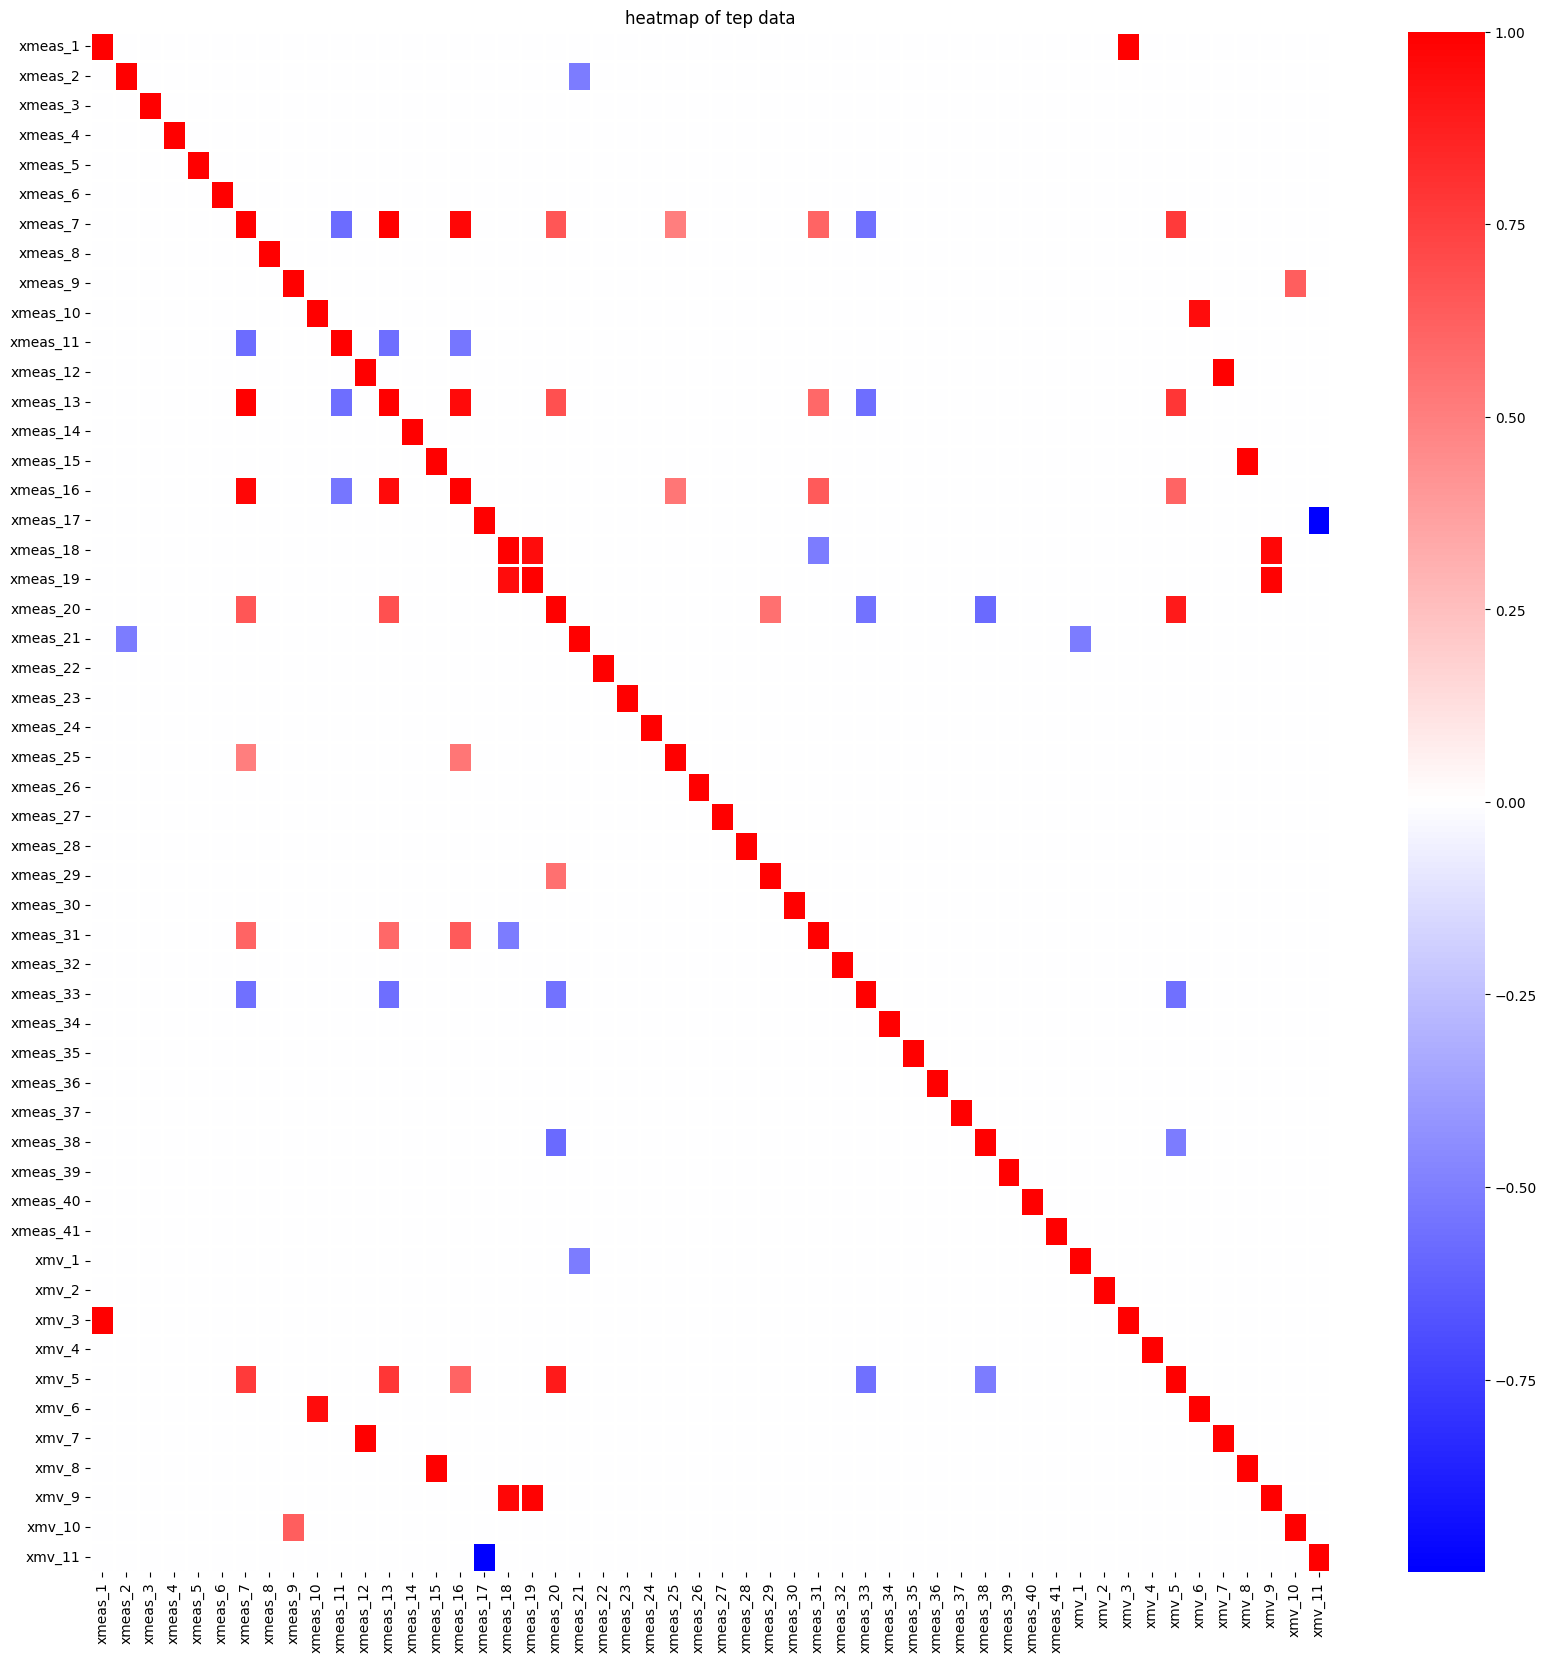

In [29]:
fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(corr_free, annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr)
axs.set_title('heatmap of tep data')
fig.savefig('tep_free_heatmap_tailored.png')

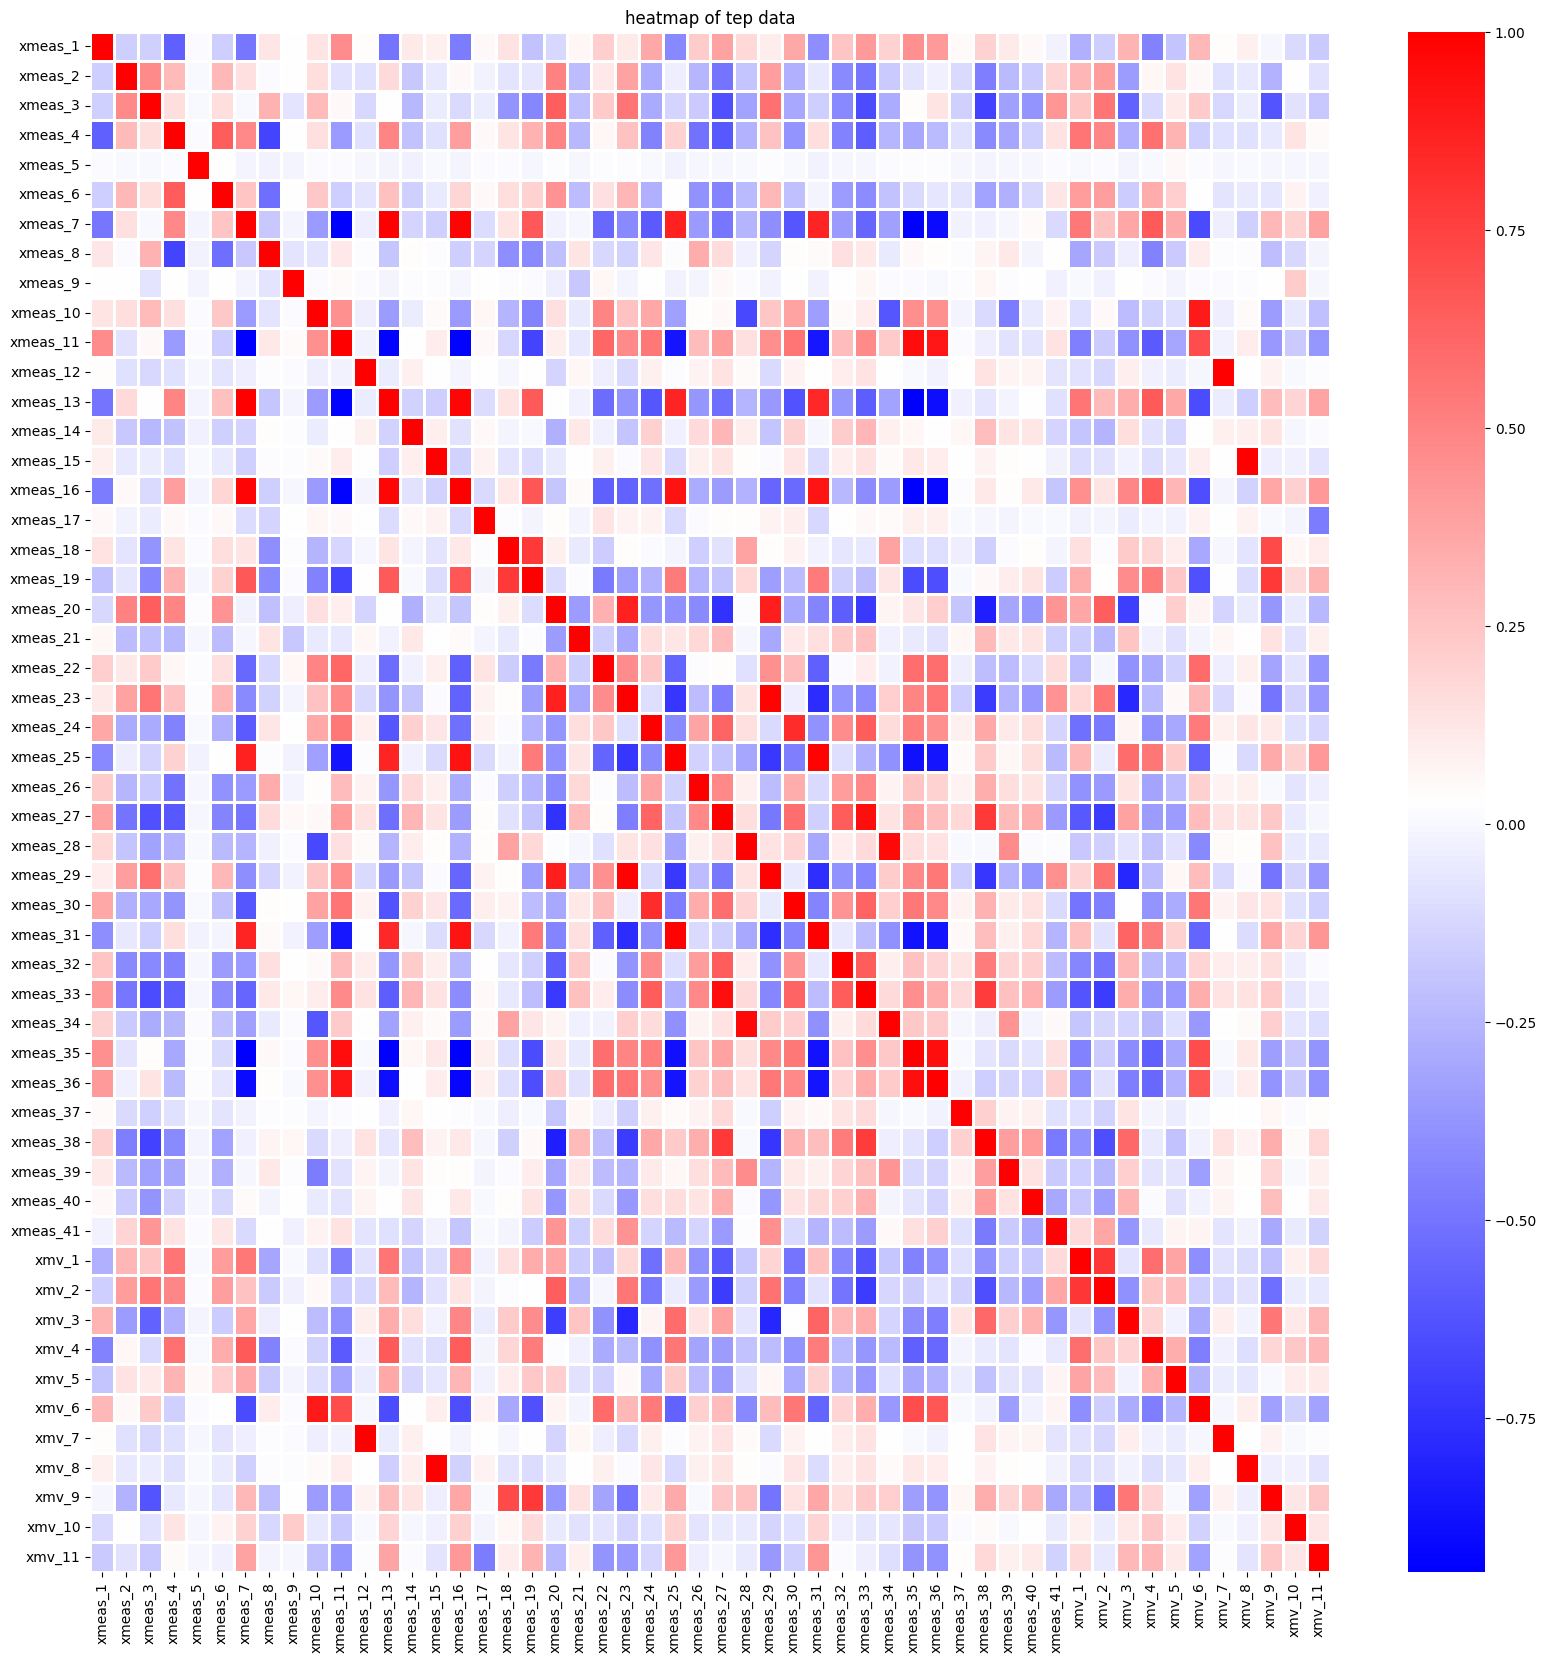

In [30]:
corr_fault = df_fault.iloc[:,3:].corr()
fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(corr_fault, annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr)
axs.set_title('heatmap of tep data')
fig.savefig('tep_fault_heatmap.png')

In [31]:
# to easily notice correlated pairs of variabls,
for i in tep:
    corr_fault[i] = corr_fault[i].apply(lambda x : x if (x>=0.5) | (x<=-0.5) else 0)
corr_fault.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
xmeas_1,1.000000,0.0,0.0,-0.578626,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
xmeas_2,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
xmeas_3,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.557585,-0.565042,0.000000,0.0,0.0,0.0,0.0,-0.624435,0.0,0.0
xmeas_4,-0.578626,0.0,0.0,1.000000,0.0,0.650086,0.0,-0.683686,0.0,0.0,...,0.000000,0.000000,0.570603,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
xmeas_5,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


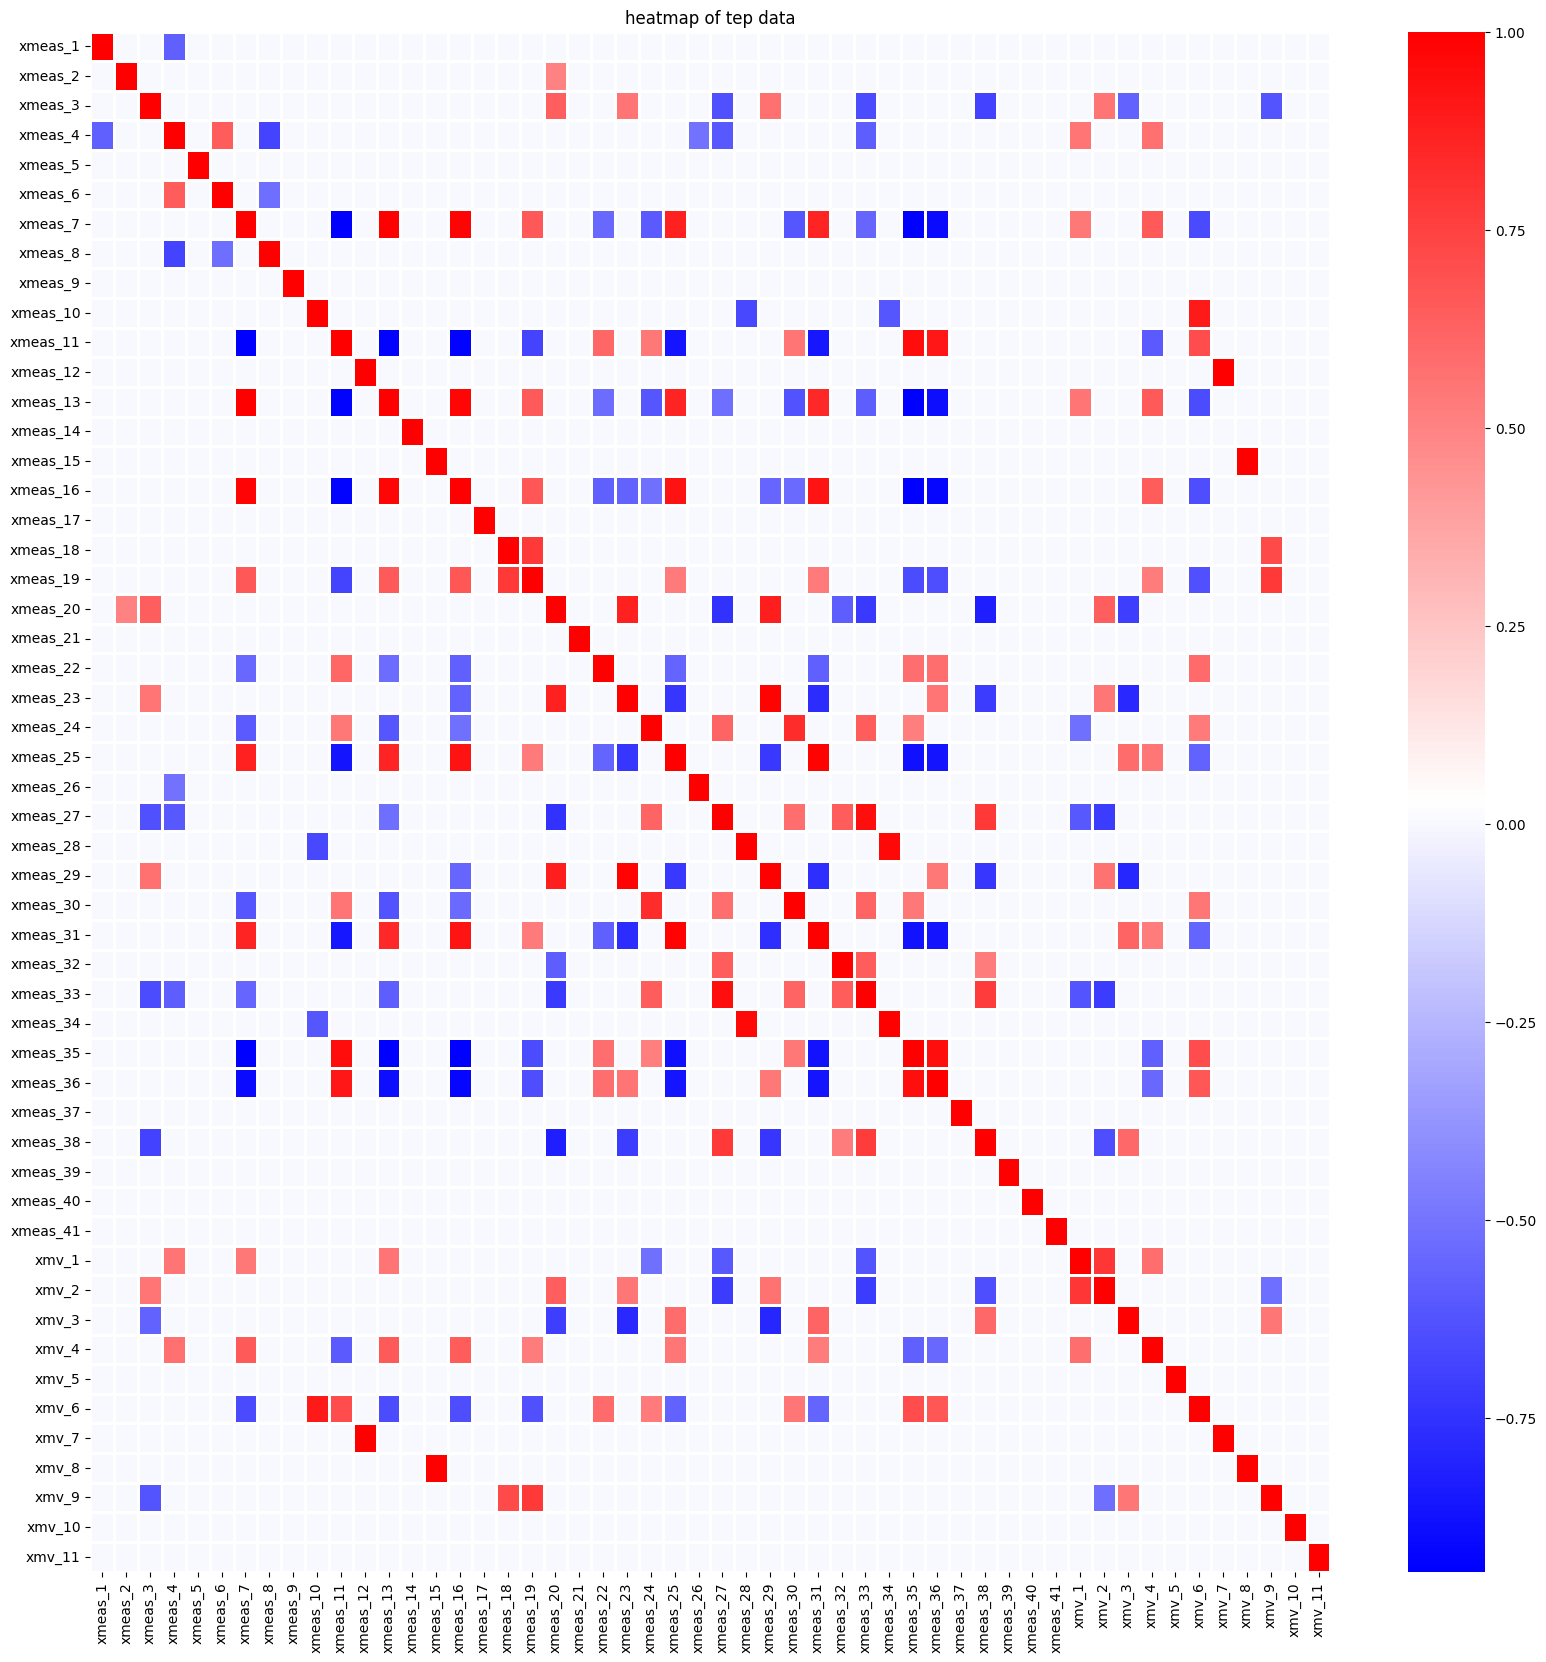

In [32]:
fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(corr_fault, annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr)
axs.set_title('heatmap of tep data')
fig.savefig('tep_fault_heatmap_tailored.png')

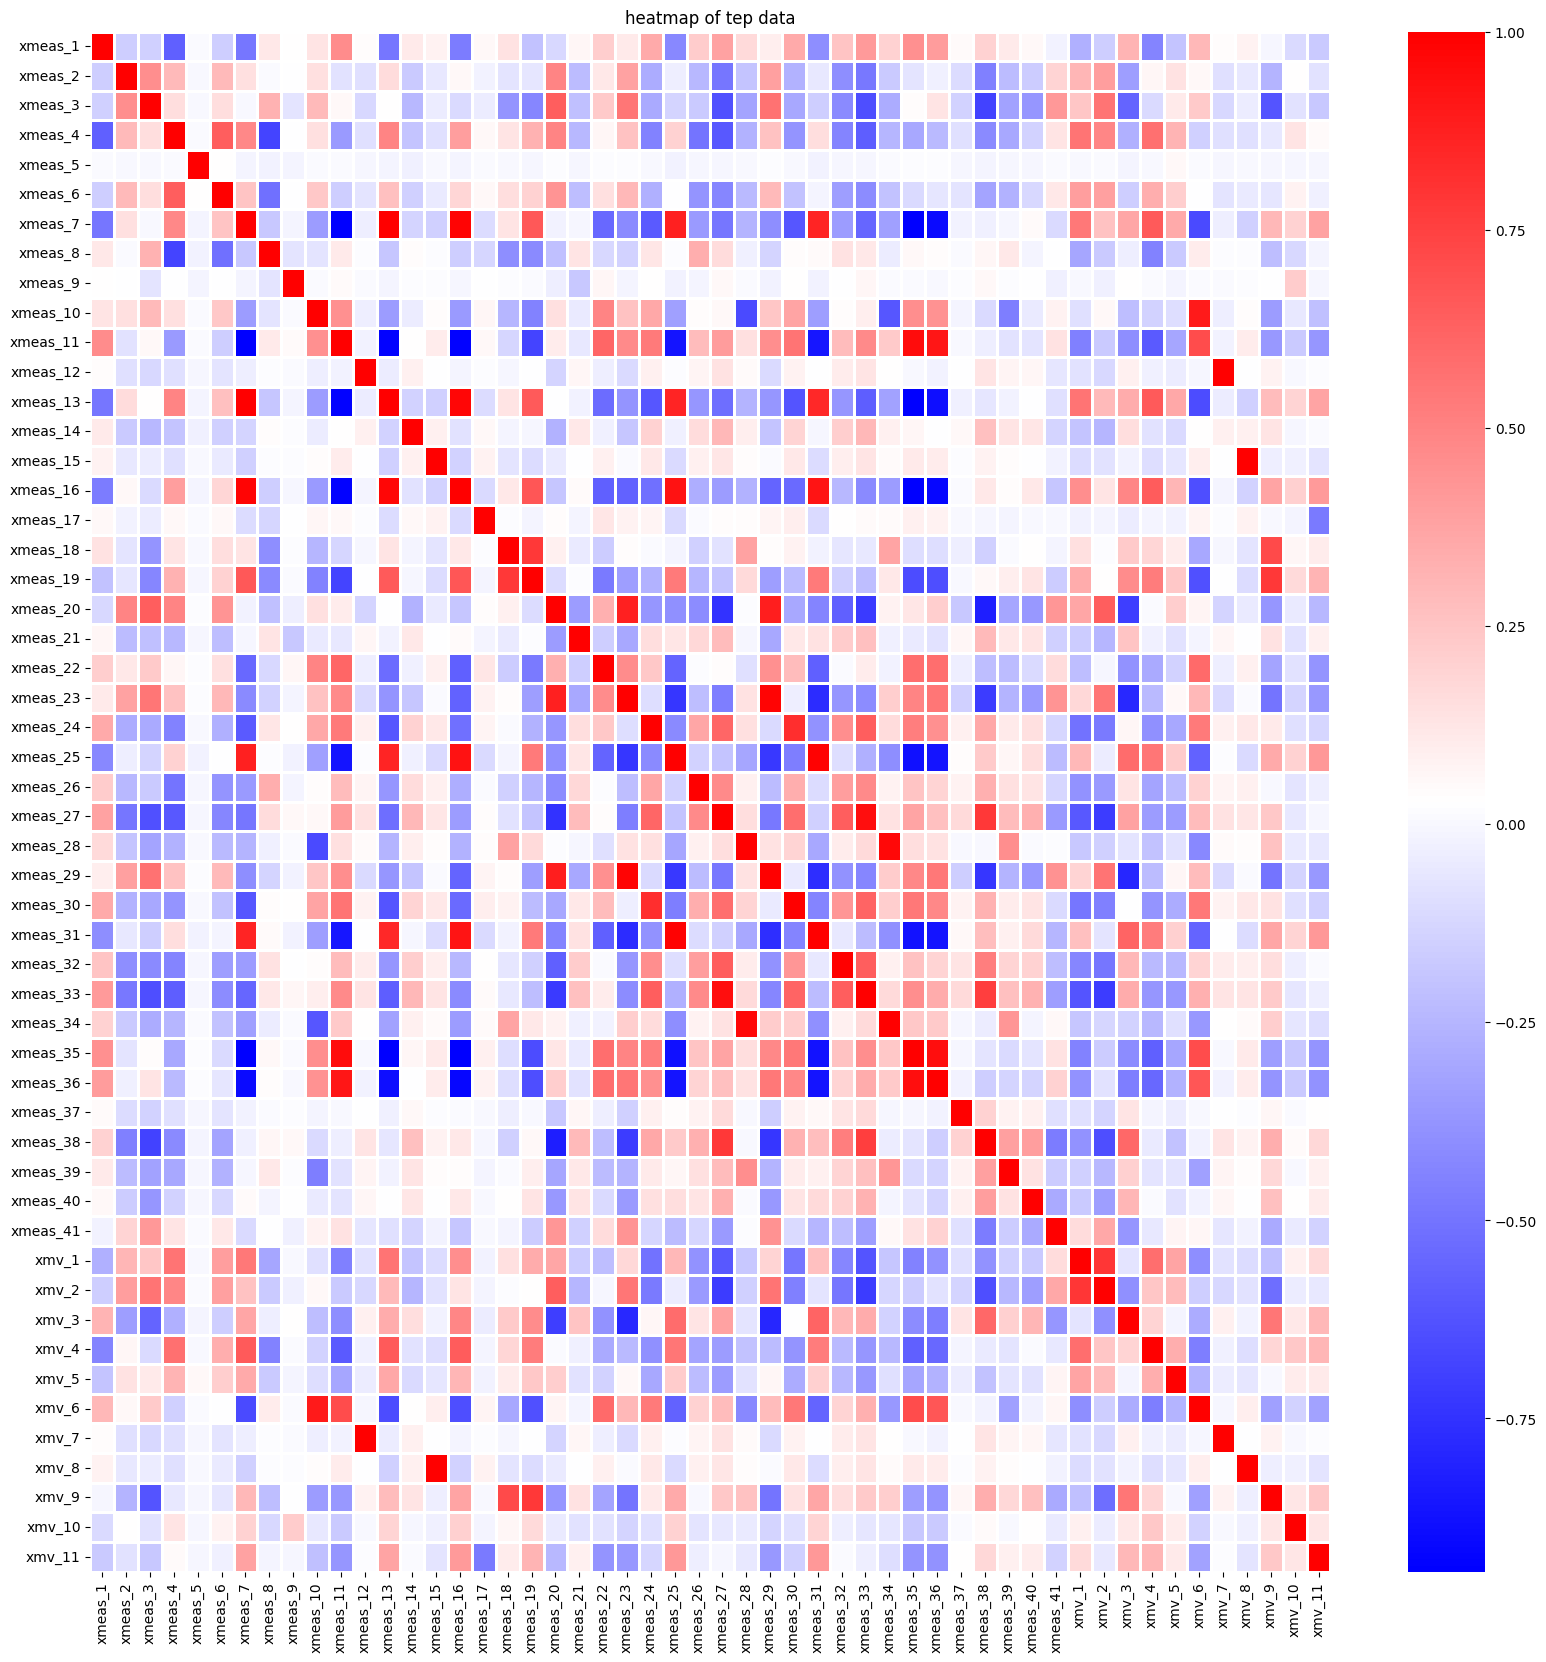

In [33]:
corr_combined = df_combined.iloc[:,3:].corr()
fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(corr_combined, annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr)
axs.set_title('heatmap of tep data')
fig.savefig('tep_combined_heatmap.png')

Before deciding variables to drop, apply TSNE to the data; this can make a different way to estimate their correlation

In [34]:
df_combined.iloc[:,3:].head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [ ]:
# to this end, transform df_combined to list
tep_tsne_data = df_combined.iloc[:,3:].values.tolist()
tep_tsne_data = np.array(tep_tsne_data).reshape(-1,52)
tep_tsne_data.shape()

In [43]:
# apply TSNE to the data
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tep_tsne = tsne.fit_transform(df_combined.iloc[:,3:].values.tolist())

# randomly generated hex colors
colors = ['#2ac759', '#3487d9', '#3cda88', '#c89d59', '#fd3f6a', '#3c84d3', '#d6c52f', '#d6d354', '#044050',
          '#ce08e0', '#4c3ad2', '#0c15ba', '#1e818e', '#d1b6a2', '#675267', '#b44fda', '#72d891', '#724605',
         '#aaefcc', '#681153', '#9738d8']

# plot with numbers
plt.figure(figsize=(10,10))
plt.xlim(tep_tsne[:,0].min(), tep_tsne[:,0].max()+1)
plt.ylim(tep_tsne[:,1].min(), tep_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(tep_tsne[i,0], tep_tsne[i,1], str(df_combined['faultNumber']))
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_train[::50,:])
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

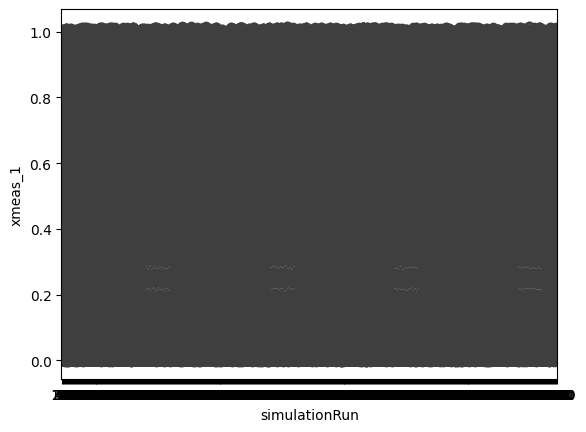

In [96]:
# check the consistency of the data in the same way
sns.boxplot(x='simulationRun', y='xmeas_1', data=df_fault)
plt.show()

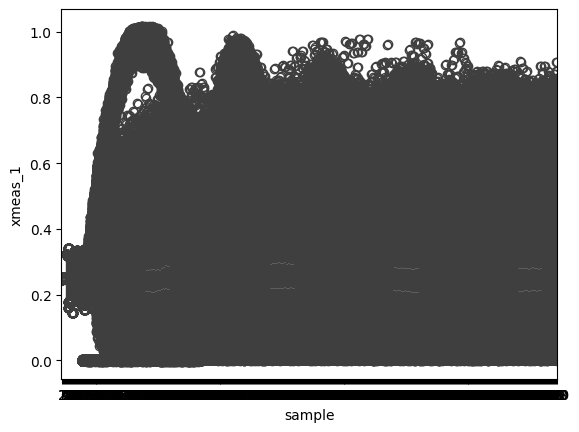

In [97]:
sns.boxplot(x='sample', y='xmeas_1', data=df_fault)
plt.show()

In [104]:
# Yeah, there are 500 samples in this dataset ;D
# select 20 of them at random and retry
import random
random_idx = []
for i in range(21):
    temp = random.randint(1,500)
    if temp not in random_idx:
        random_idx.append(temp)
print(len(random_idx), ':', random_idx)

21 : [117, 108, 207, 50, 233, 61, 309, 292, 151, 188, 408, 109, 30, 499, 340, 457, 404, 353, 181, 361, 31]


In [118]:
df_fault_run20 = df_fault[df_fault['simulationRun'].isin(random_idx)]
df_fault_run20.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
290000,1,30.0,1,0.24981,3655.6,4512.4,9.4059,26.855,42.614,2705.4,...,53.943,24.714,61.360,22.086,40.071,33.381,46.373,47.447,40.985,13.507
290001,1,30.0,2,0.24902,3660.3,4513.1,9.2877,27.044,42.438,2707.1,...,53.935,24.791,61.910,22.492,40.147,38.888,46.205,47.502,41.262,18.439
290002,1,30.0,3,0.25094,3665.7,4529.1,9.3366,26.666,42.518,2706.4,...,53.742,24.611,59.607,22.141,39.839,36.748,47.442,47.486,40.830,19.149
290003,1,30.0,4,0.25070,3623.7,4503.0,9.3324,26.742,42.378,2705.5,...,54.054,24.634,60.879,22.000,39.955,41.609,49.220,47.513,41.071,17.819
290004,1,30.0,5,0.23859,3651.7,4549.7,9.3163,27.162,42.250,2701.2,...,53.603,23.571,64.185,22.026,40.739,41.489,50.473,47.603,40.494,19.130


In [119]:
df_fault_run20['simulationRun'].unique()

array([ 30.,  31.,  50.,  61., 108., 109., 117., 151., 181., 188., 207.,
       233., 292., 309., 340., 353., 361., 404., 408., 457., 499.])

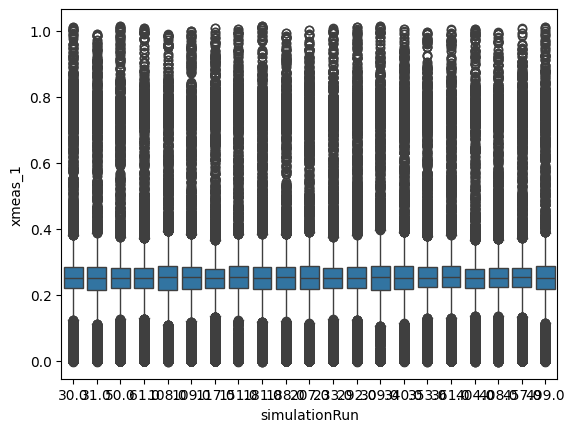

In [120]:
sns.boxplot(x='simulationRun', y='xmeas_1', data=df_fault_run20)
plt.show()

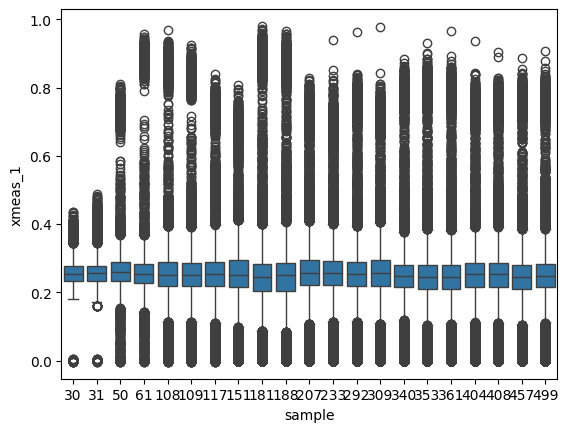

In [121]:
df_fault_sample20 = df_fault[df_fault['sample'].isin(random_idx)]
sns.boxplot(x='sample', y='xmeas_1', data=df_fault_sample20)
plt.show()

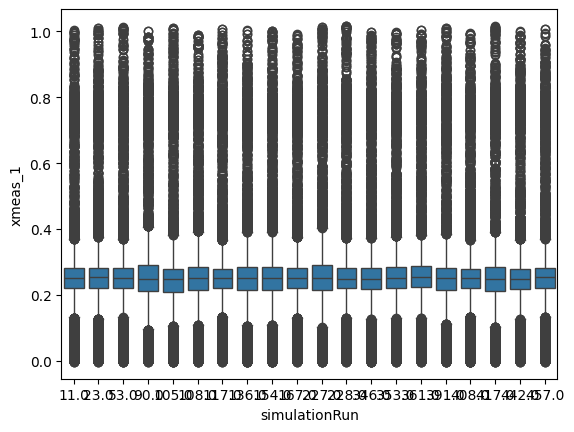

In [122]:
# do this with other 20 samples
random_idx = []
for i in range(21):
    temp = random.randint(1,500)
    if temp not in random_idx:
        random_idx.append(temp)

# run
df_fault_run20 = df_fault[df_fault['simulationRun'].isin(random_idx)]
sns.boxplot(x='simulationRun', y='xmeas_1', data=df_fault_run20)
plt.show()

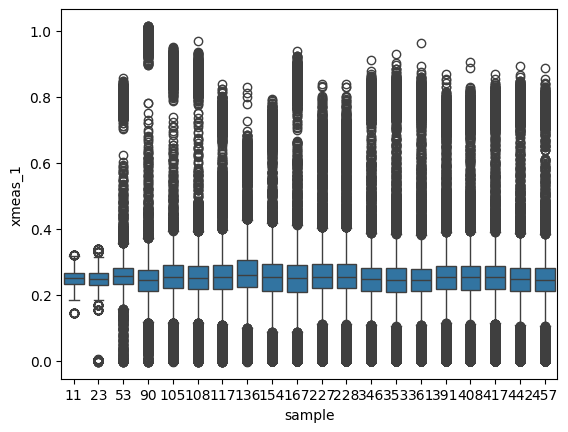

In [123]:
df_fault_sample20 = df_fault[df_fault['sample'].isin(random_idx)]
sns.boxplot(x='sample', y='xmeas_1', data=df_fault_sample20)
plt.show()

In [ ]:
# check the consistency with respect to other tep variables